# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [64]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding Submission/Machine Learning Pemula/Air Quality/Data/Air_Quality_labeled.csv')
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Cluster
0,-0.554217,-0.693069,-0.195111,-0.636364,-0.555556,0.369231,-0.765,0.851190,-0.880165,0.0,2.230769,1
1,-0.506024,-0.653465,-0.195111,-0.636364,-0.555556,0.369231,-0.785,0.863095,-0.855372,0.0,2.461538,1
2,-0.518072,-0.663366,-0.130074,-0.568182,-0.555556,0.307692,-0.785,0.880952,-0.855372,0.0,3.153846,1
3,-0.530120,-0.673267,0.260147,-0.545455,-0.555556,0.292308,-0.800,0.940476,-0.904959,0.0,1.230769,1
4,-0.566265,-0.702970,0.325184,-0.522727,-0.555556,0.292308,-0.830,0.982143,-0.909091,0.0,0.384615,1


# **3. Deteksi Outliers & Penanganan Outliers**

### Deteksi Outliers

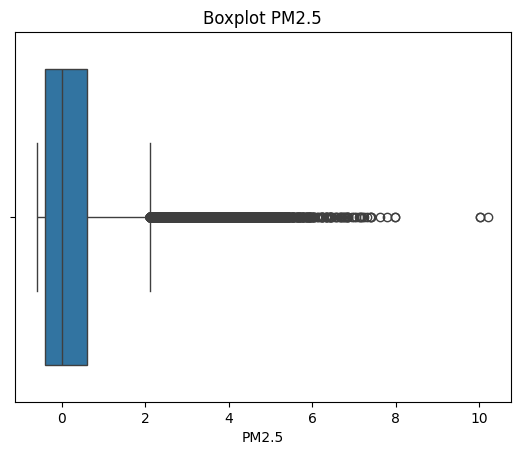

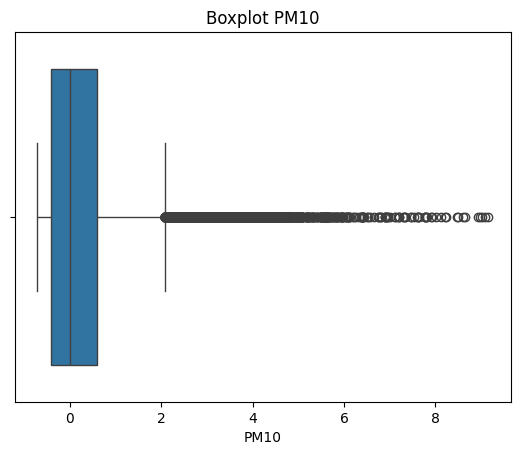

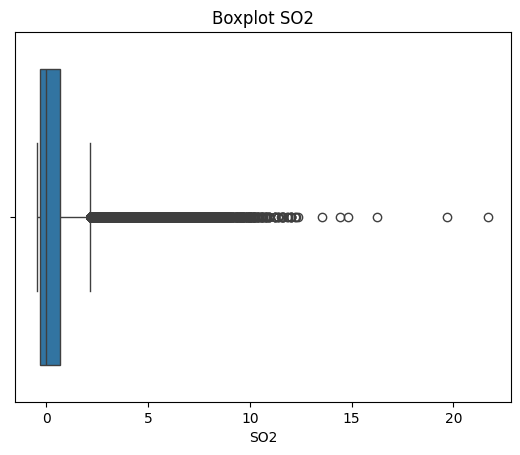

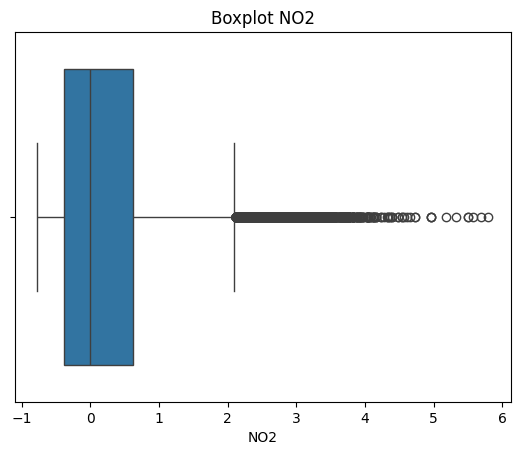

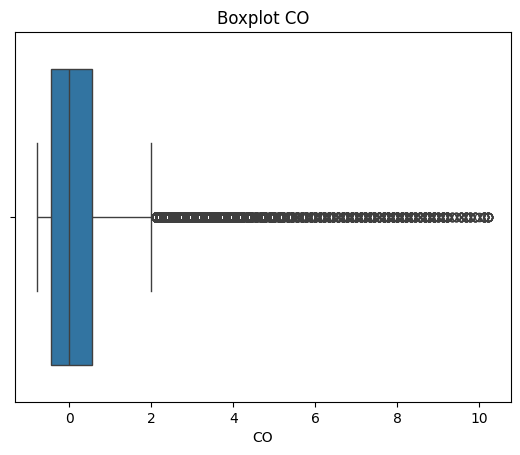

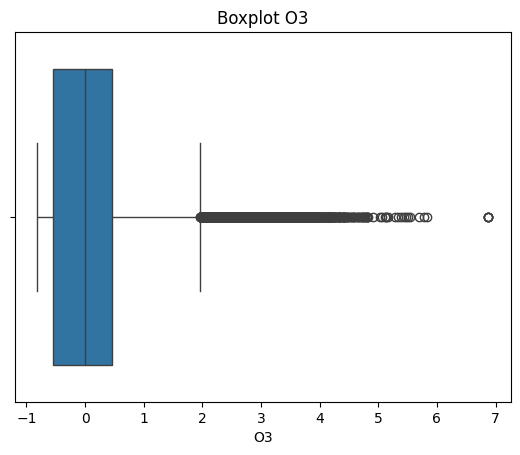

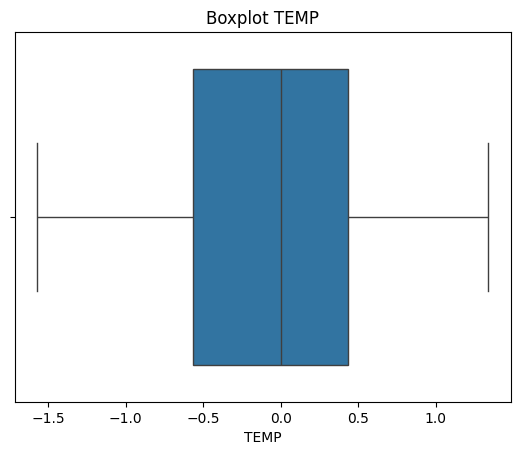

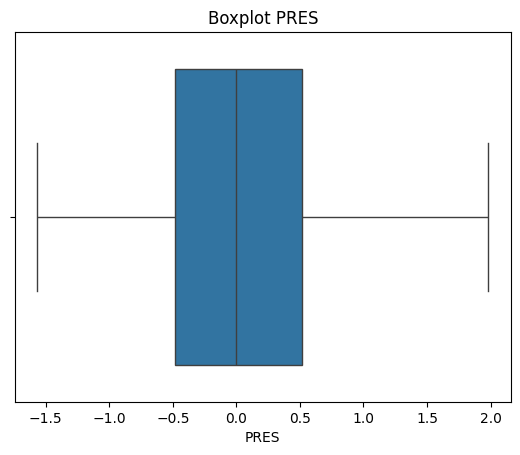

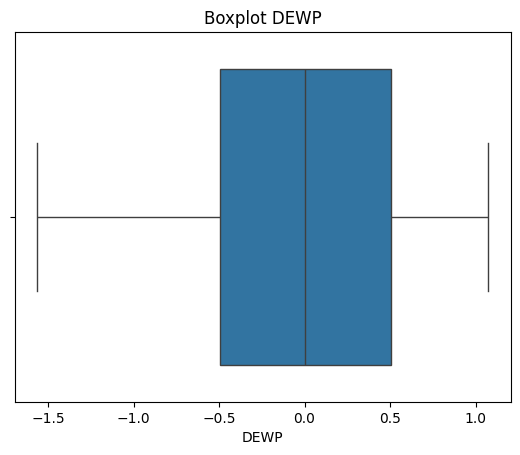

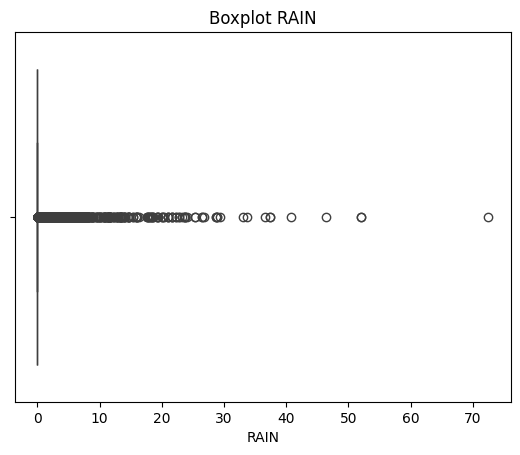

Text(0.5, 1.0, 'Boxplot WSPM')

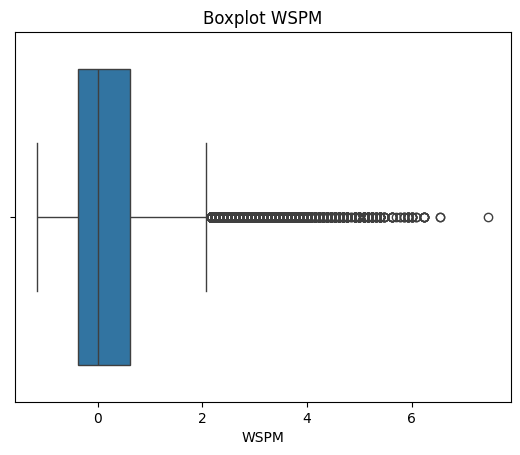

In [45]:
# PM2.5
sns.boxplot(x=df['PM2.5']) # Deteksi
plt.title("Boxplot PM2.5")
plt.show()

# PM10
sns.boxplot(x=df['PM10']) # Deteksi
plt.title("Boxplot PM10")
plt.show()

# SO2
sns.boxplot(x=df['SO2']) # Deteksi
plt.title("Boxplot SO2")
plt.show()

# NO2
sns.boxplot(x=df['NO2']) # Deteksi
plt.title("Boxplot NO2")
plt.show()

# CO
sns.boxplot(x=df['CO']) # Deteksi
plt.title("Boxplot CO")
plt.show()

# O3
sns.boxplot(x=df['O3']) # Deteksi
plt.title("Boxplot O3")
plt.show()

# TEMP
sns.boxplot(x=df['TEMP']) # Deteksi
plt.title("Boxplot TEMP")
plt.show()

# PRES
sns.boxplot(x=df['PRES']) # Deteksi
plt.title("Boxplot PRES")
plt.show()

# DEWP
sns.boxplot(x=df['DEWP']) # Deteksi
plt.title("Boxplot DEWP")
plt.show()

# RAIN
sns.boxplot(x=df['RAIN']) # Deteksi
plt.title("Boxplot RAIN")
plt.show()

# WSPM
sns.boxplot(x=df['WSPM']) # Deteksi
plt.title("Boxplot WSPM")

In [46]:
# Hitung outliers melalui IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, len(outliers), (len(outliers) / len(data)) * 100  # Jumlah dan persentase outlier

# Hitung presentase outliers untuk polutan
outliers_pm25, count_pm25, percent_pm25 = detect_outliers_iqr(df, "PM2.5")
outliers_pm10, count_pm10, percent_pm10 = detect_outliers_iqr(df, "PM10")
outliers_so2, count_so2, percent_so2 = detect_outliers_iqr(df, "SO2")
outliers_no2, count_no2, percent_no2 = detect_outliers_iqr(df, "NO2")
outliers_co, count_co, percent_co = detect_outliers_iqr(df, "CO")
outliers_o3, count_o3, percent_o3 = detect_outliers_iqr(df, "O3")

# Hitung presentase outliers untuk faktor polutan
outliers_temp, count_temp, percent_temp = detect_outliers_iqr(df, "TEMP")
outliers_pres, count_pres, percent_pres = detect_outliers_iqr(df, "PRES")
outliers_dewp, count_dewp, percent_dewp = detect_outliers_iqr(df, "DEWP")
outliers_rain, count_rain, percent_rain = detect_outliers_iqr(df, "RAIN")
outliers_wspm, count_wspm, percent_wspm = detect_outliers_iqr(df, "WSPM")

# Tampilkan presentase outliers hasil polutan
print(f"Outlier PM2.5: {count_pm25} data ({percent_pm25:.2f}%)")
print(f"Outlier PM10: {count_pm10} data ({percent_pm10:.2f}%)")
print(f"Outlier SO2: {count_so2} data ({percent_so2:.2f}%)")
print(f"Outlier NO2: {count_no2} data ({percent_no2:.2f}%)")
print(f"Outlier CO: {count_co} data ({percent_co:.2f}%)")
print(f"Outlier O3: {count_o3} data ({percent_o3:.2f}%)")


# Tampilkan hasil faktor polutan
print(f"Outlier TEMP: {count_temp} data ({percent_temp:.2f}%)")
print(f"Outlier PRES: {count_pres} data ({percent_pres:.2f}%)")
print(f"Outlier DEWP: {count_dewp} data ({percent_dewp:.2f}%)")
print(f"Outlier RAIN: {count_rain} data ({percent_rain:.2f}%)")
print(f"Outlier WSPM: {count_wspm} data ({percent_wspm:.2f}%)")

Outlier PM2.5: 5405 data (5.14%)
Outlier PM10: 3971 data (3.78%)
Outlier SO2: 9450 data (8.98%)
Outlier NO2: 2392 data (2.27%)
Outlier CO: 7968 data (7.57%)
Outlier O3: 4730 data (4.50%)
Outlier TEMP: 0 data (0.00%)
Outlier PRES: 0 data (0.00%)
Outlier DEWP: 0 data (0.00%)
Outlier RAIN: 4202 data (3.99%)
Outlier WSPM: 6342 data (6.03%)


### Handling Outliers

#### Imputasi median

In [47]:
# from scipy.stats import shapiro

# def shapiro_test_columns(df, columns):
#     results = {}
#     for col in columns:
#         data = df[col].dropna()
#         if len(data) < 3:
#             results[col] = {"p_value": None, "status": "Data terlalu sedikit"}
#             continue
#         stat, p = shapiro(data)
#         status = "Normal" if p > 0.05 else "Tidak Normal"
#         results[col] = {"status": status}
#     return results


In [48]:
# polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
# hasil_uji = shapiro_test_columns(df, polutan)

# for col, res in hasil_uji.items():
#     print(f"{col}: Distribusi = {res['status']}")

In [49]:
# rain_test_result = shapiro_test_columns(df, ['RAIN'])
# wspm_test_result = shapiro_test_columns(df, ['WSPM'])

# print("Distribusi RAIN:", rain_test_result['RAIN']['status'])
# print("Distribusi WSPM:", wspm_test_result['WSPM']['status'])

In [50]:
# # Handling outlier pada kolom polutan dengan Metode imputasi median
# def impute_outliers_with_median(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     median_value = df[column].median()
#     df.loc[(df[column] < lower) | (df[column] > upper), column] = median_value
#     return df

# df = impute_outliers_with_median(df, 'PM2.5')
# df = impute_outliers_with_median(df,'PM10')
# df = impute_outliers_with_median(df,'SO2')
# df = impute_outliers_with_median(df, 'NO2')
# df = impute_outliers_with_median(df, 'CO')
# df = impute_outliers_with_median(df, 'O3')
# df = impute_outliers_with_median(df, 'WSPM')

#### Penghapusan Outliers

In [51]:
def remove_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outlier_iqr(df, 'PM2.5')
df = remove_outlier_iqr(df, 'PM10')
df = remove_outlier_iqr(df, 'SO2')
df = remove_outlier_iqr(df, 'NO2')
df = remove_outlier_iqr(df, 'CO')
df = remove_outlier_iqr(df, 'O3')
df = remove_outlier_iqr(df, 'WSPM')

## Visualization of outlier handling results


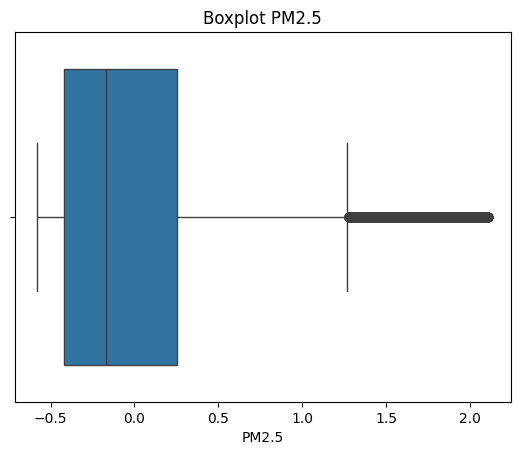

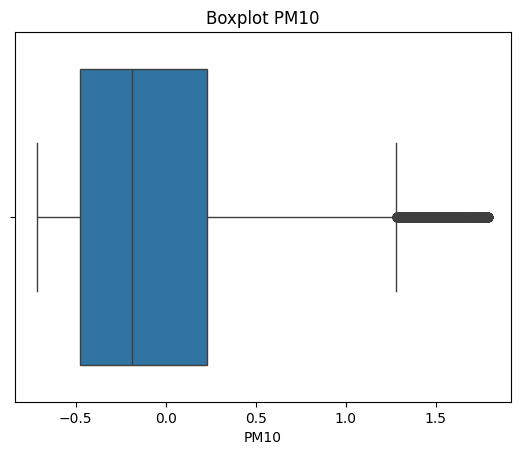

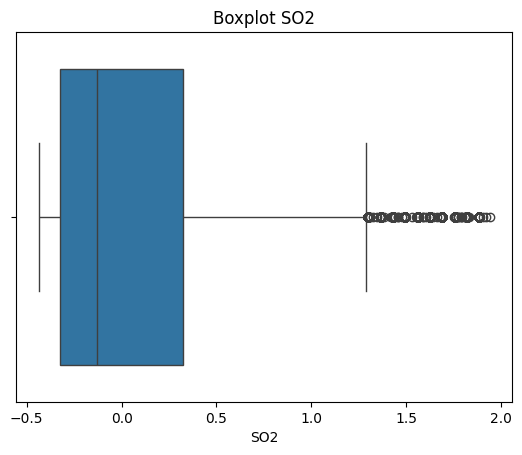

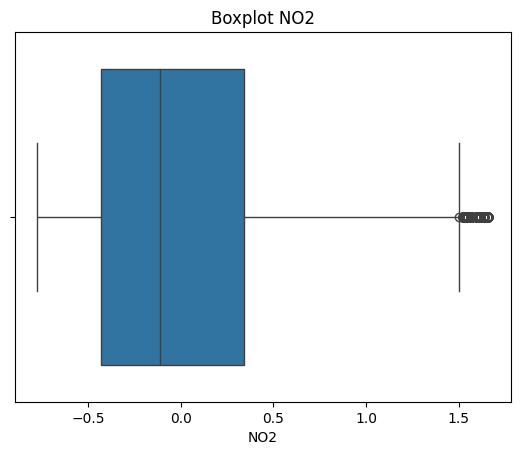

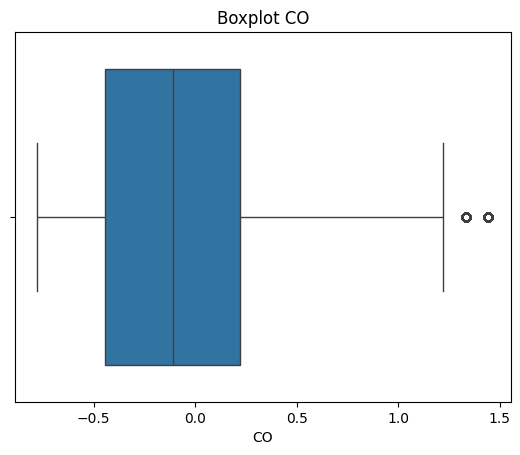

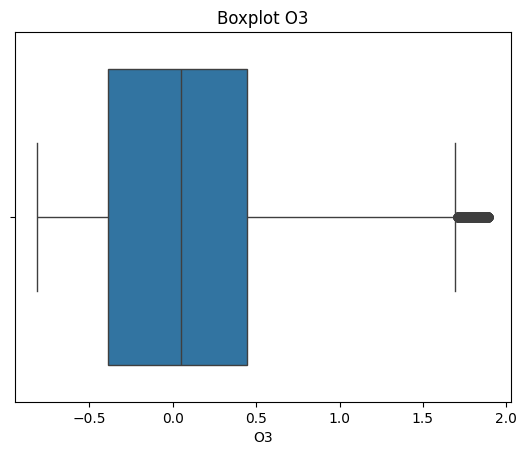

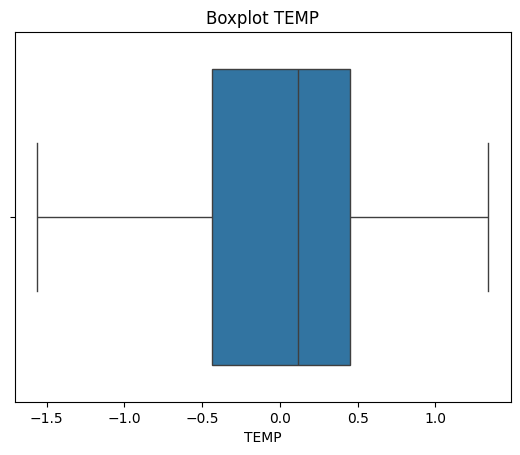

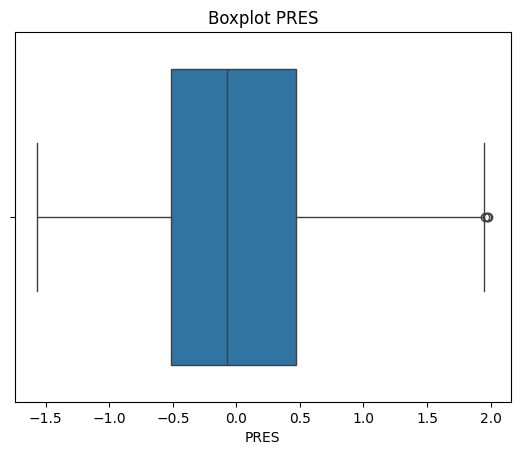

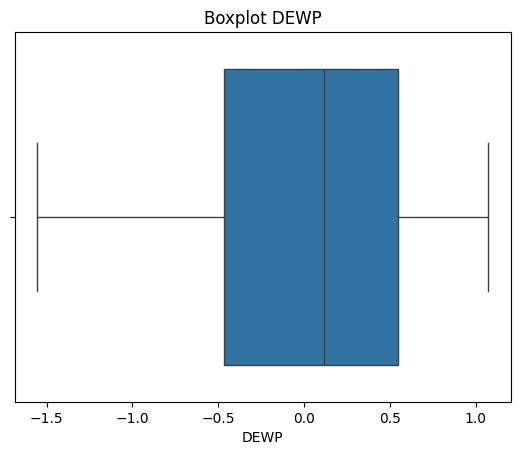

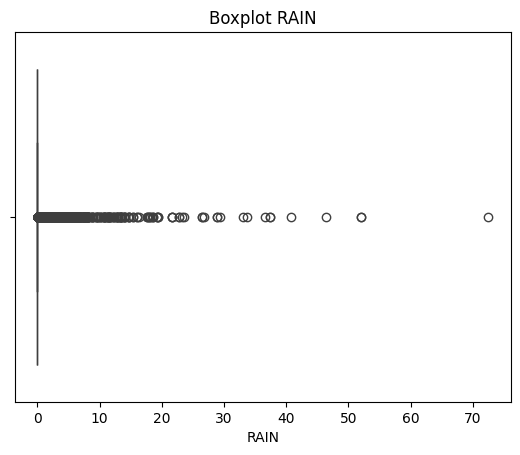

Text(0.5, 1.0, 'Boxplot WSPM')

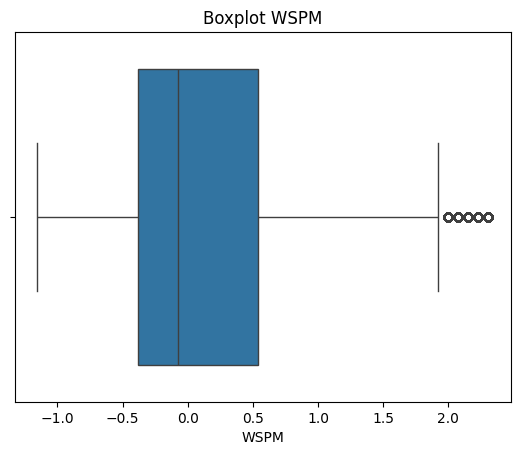

In [52]:
# PM2.5
sns.boxplot(x=df['PM2.5']) # Deteksi
plt.title("Boxplot PM2.5")
plt.show()

# PM10
sns.boxplot(x=df['PM10']) # Deteksi
plt.title("Boxplot PM10")
plt.show()

# SO2
sns.boxplot(x=df['SO2']) # Deteksi
plt.title("Boxplot SO2")
plt.show()

# NO2
sns.boxplot(x=df['NO2']) # Deteksi
plt.title("Boxplot NO2")
plt.show()

# CO
sns.boxplot(x=df['CO']) # Deteksi
plt.title("Boxplot CO")
plt.show()

# O3
sns.boxplot(x=df['O3']) # Deteksi
plt.title("Boxplot O3")
plt.show()

# TEMP
sns.boxplot(x=df['TEMP']) # Deteksi
plt.title("Boxplot TEMP")
plt.show()

# PRES
sns.boxplot(x=df['PRES']) # Deteksi
plt.title("Boxplot PRES")
plt.show()

# DEWP
sns.boxplot(x=df['DEWP']) # Deteksi
plt.title("Boxplot DEWP")
plt.show()

# RAIN
sns.boxplot(x=df['RAIN']) # Deteksi
plt.title("Boxplot RAIN")
plt.show()

# WSPM
sns.boxplot(x=df['WSPM']) # Deteksi
plt.title("Boxplot WSPM")

Imbalance Data

In [65]:
# Menunjukkan Keseimbangan Cluster 0 dan Cluster 1
pd.Series(df['Cluster']).value_counts()

,count
Cluster,
1,85028
0,20164


# **4. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [53]:
# Pisahkan features (X) and target (y ='cluster')
X = df.drop(['Cluster'], axis=1)
y = df['Cluster']

# Split data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan hasil splitting
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 60095
Jumlah data uji: 15024


# **5. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [54]:
# Mencoba semua model demi efisiensi
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': svm.SVC()
}

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [55]:
# Pelatihan and Evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("="*50)

Model: Logistic Regression
Accuracy: 0.9993343982960596
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       519
           1       1.00      1.00      1.00     14505

    accuracy                           1.00     15024
   macro avg       1.00      0.99      0.99     15024
weighted avg       1.00      1.00      1.00     15024

Confusion Matrix:
 [[  511     8]
 [    2 14503]]
Model: Decision Tree
Accuracy: 0.9868876464323749
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       519
           1       0.99      0.99      0.99     14505

    accuracy                           0.99     15024
   macro avg       0.90      0.91      0.90     15024
weighted avg       0.99      0.99      0.99     15024

Confusion Matrix:
 [[  430    89]
 [  108 14397]]
Model: SVM
Accuracy: 0.9990681576144835
Classification Report:
               precision    r

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. Logistic Regression → Model dengan Akurasi Tertinggi (99.93%)

2. Decision Tree → Akurasi Terendah (98.65%)

3. Support Vector Machine → Akurasi Tertinggi ke-2 (99.9%)

In [56]:
for model_name, model in models.items():
    model.fit(X_train,y_train)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_train_pred_c = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred_c)
    # Prediksi testing
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"Akurasi Training: {train_acc:.4f}")
    print(f"Akurasi Testing: {test_acc:.4f}\n")

Model: Logistic Regression
Akurasi Training: 0.9996
Akurasi Testing: 0.9993

Model: Decision Tree
Akurasi Training: 1.0000
Akurasi Testing: 0.9871

Model: SVM
Akurasi Training: 0.9993
Akurasi Testing: 0.9991



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [57]:
#GridSearchCV for Logistic Regression
param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# initial model and GridSearchCV
log_reg = LogisticRegression(max_iter=1000)
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit model to data
grid_search_log_reg.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search_log_reg.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_log_reg.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9996172726516349


In [58]:
# GridSearchCV untuk Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_dt.best_score_}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9886180214660122


In [59]:
# GridSearchCV untuk SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]
}

svc = SVC()
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search_svc.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_svc.best_score_}")

Best Hyperparameters: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9998003161660705


In [60]:
# Menampilkan Parameter terbaik untuk setiap model dan juga hasil cross-validation terbaik
# print all best hyperparamaters and best cross - validation
print("Best Hyperparameters and Best Cross-Validation Accuracy for model logistic regression")
print(f"Best Hyperparameters: {grid_search_log_reg.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_log_reg.best_score_}")
print("="*50)
print("Best Hyperparameters and Best Cross-Validation Accuracy for model decision tree")
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_dt.best_score_}")
print("="*50)
print("Best Hyperparameters and Best Cross-Validation Accuracy for model decision tree")
print(f"Best Hyperparameters: {grid_search_svc.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_svc.best_score_}")
print("="*50)

Best Hyperparameters and Best Cross-Validation Accuracy for model logistic regression
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9996172726516349
Best Hyperparameters and Best Cross-Validation Accuracy for model decision tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9886180214660122
Best Hyperparameters and Best Cross-Validation Accuracy for model decision tree
Best Hyperparameters: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9998003161660705


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Hyperparameter terbaik untuk Logistic Regression
log_reg_best = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')  # isi setiap parameter berdasarkan hasil dari gridsearch yang telah diterapkan pada setiap model
log_reg_best.fit(X_train, y_train)
log_reg_predictions = log_reg_best.predict(X_test)

# Hyperparameter terbaik untuk Decision Tree
decision_tree_best = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=2, min_samples_split=5)
decision_tree_best.fit(X_train, y_train)
decision_tree_predictions = decision_tree_best.predict(X_test)

# Hyperparameter terbaik untuk SVC
svc_best = SVC(C=100, degree=3, gamma='scale', kernel='linear')
svc_best.fit(X_train, y_train)
svc_predictions = svc_best.predict(X_test)

# Evaluasi performa setiap model dengan hyperparameter terbaiknya masing masing
models = {
    "Logistic Regression": log_reg_best,
    "Decision Tree": decision_tree_best,
    "SVC": svc_best
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("="*50)


Model: Logistic Regression
Accuracy: 0.9970713525026624
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       519
           1       1.00      1.00      1.00     14505

    accuracy                           1.00     15024
   macro avg       1.00      0.96      0.98     15024
weighted avg       1.00      1.00      1.00     15024

Confusion Matrix:
 [[  475    44]
 [    0 14505]]
Model: Decision Tree
Accuracy: 0.9860223642172524
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       519
           1       0.99      0.99      0.99     14505

    accuracy                           0.99     15024
   macro avg       0.88      0.92      0.90     15024
weighted avg       0.99      0.99      0.99     15024

Confusion Matrix:
 [[  445    74]
 [  136 14369]]
Model: SVC
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **1. Logistic Regression**

* **Sebelum Hyperparameter Tuning:**

  * **Accuracy:** 0.9993
  * **Precision & Recall:**

    * Kelas 0: precision 1.00, recall 0.98
    * Kelas 1: precision 1.00, recall 1.00
  * **Confusion Matrix:**

    * Kelas 0: 8 instance salah klasifikasi
    * Kelas 1: 2 instance salah klasifikasi

  **Analisis:**
  Model sangat akurat, terutama pada kelas mayoritas (kelas 1). Performa pada kelas minoritas (kelas 0) juga sangat tinggi, dengan kesalahan sangat kecil.

* **Setelah Hyperparameter Tuning:**

  * **Accuracy:** 0.9971
  * **Precision & Recall:**

    * Kelas 0: precision 1.00, recall 0.92
    * Kelas 1: precision 1.00, recall 1.00
  * **Confusion Matrix:**

    * Kelas 0: 44 instance salah klasifikasi (meningkat)
    * Kelas 1: 0 salah klasifikasi

  **Analisis:**
  Setelah tuning, model sedikit kehilangan sensitivitas terhadap kelas minoritas. **Recall kelas 0 menurun**, menunjukkan model lebih sering salah mengklasifikasikan kelas 0 sebagai kelas 1. Meski akurasi keseluruhan tetap tinggi, performa terhadap kelas minoritas memburuk.

---

### **2. Decision Tree**

* **Sebelum Hyperparameter Tuning:**

  * **Accuracy:** 0.9866
  * **Precision & Recall:**

    * Kelas 0: precision 0.79, recall 0.83
    * Kelas 1: precision 0.99, recall 0.99
  * **Confusion Matrix:**

    * Kelas 0: 89 kesalahan
    * Kelas 1: 113 kesalahan

  **Analisis:**
  Model menunjukkan performa baik pada kelas mayoritas, namun masih cukup banyak kesalahan pada kelas minoritas. Keseimbangan antara precision dan recall pada kelas 0 cukup baik, tapi belum ideal.

* **Setelah Hyperparameter Tuning:**

  * **Accuracy:** 0.9860
  * **Precision & Recall:**

    * Kelas 0: precision 0.77, recall 0.86
    * Kelas 1: precision 0.99, recall 0.99
  * **Confusion Matrix:**

    * Kelas 0: 74 kesalahan
    * Kelas 1: 136 kesalahan

  **Analisis:**
  Ada sedikit peningkatan pada **recall kelas 0**, namun **precision-nya sedikit menurun**. Model menjadi sedikit lebih "berani" dalam mengklasifikasikan kelas 0, namun itu dibayar dengan ketepatan yang sedikit menurun. Overall, perbedaan tidak terlalu signifikan.

---

### **3. SVC**

* **Sebelum Hyperparameter Tuning:**

  * **Accuracy:** 0.9991
  * **Precision & Recall:**

    * Kelas 0: precision 0.99, recall 0.98
    * Kelas 1: precision 1.00, recall 1.00
  * **Confusion Matrix:**

    * Kelas 0: 9 kesalahan
    * Kelas 1: 5 kesalahan

  **Analisis:**
  Model sudah sangat kuat sebelum tuning, baik di kelas mayoritas maupun minoritas. Sangat sedikit kesalahan klasifikasi.

* **Setelah Hyperparameter Tuning:**

  * **Accuracy:** 1.0000
  * **Precision & Recall:**

    * Kelas 0 & 1: precision dan recall = 1.00
  * **Confusion Matrix:**

    * **0 kesalahan total**

  **Analisis:**
  Hasil **sempurna**. Setelah tuning, model mampu mengklasifikasikan semua instance dengan benar. Ini bisa menunjukkan bahwa model sangat baik, **tapi juga perlu diwaspadai kemungkinan overfitting**, terutama jika model terlalu cocok dengan data latih dan uji.

---

###  **Kesimpulan Umum:**

* **Logistic Regression:** Penurunan performa kelas 0 setelah tuning, meski secara keseluruhan masih sangat baik.
* **Decision Tree:** Konsisten, namun tuning tidak terlalu meningkatkan akurasi secara signifikan.
* **SVC:** Performa luar biasa setelah tuning, namun perlu dievaluasi lebih lanjut pada data baru untuk memastikan generalisasi.

Jika kamu ingin, kita juga bisa bahas **kenapa tuning bisa menurunkan performa** atau **strategi pengelolaan kelas imbalance secara adil tanpa mengorbankan generalisasi model**.


# Kesimpulan:
**Logistic Regression adalah model terbaik karena memiliki akurasi tertinggi (99.98%), kesalahan prediksi paling sedikit, lebih stabil setelah tuning, dan lebih baik dalam memprediksi kelas 1 dibanding Support Vector Classifier (SVC). Namun model SVC juga dapat menjadi opsi lain sebagai pengganti model Logistic Regression**

Namun terdapat imbalance data dikarenakan jumlah antara data yang termasuk cluster 0 dan cluster 1 sangat tidak seimbang.
